In [2]:
import pandas as pd

# Caminho do arquivo (se estiver na mesma pasta do .py, deixa só o nome)
arquivo = "bcdata.sgs.1786.csv"

# Lendo o CSV do Banco Central
df = pd.read_csv(
    arquivo,
    sep=';',      # separador padrão do BCB
    decimal=','   # decimal brasileiro
)

df

,data,valor
0,01/02/1980,169309000
1,01/03/1980,173809000
2,01/04/1980,179809000
3,01/05/1980,187309000
4,01/06/1980,200809000
...,...,...
546,01/08/2025,355684839
547,01/09/2025,355349840
548,01/10/2025,354085275
549,01/11/2025,355241736


In [4]:
df['data'] = pd.to_datetime(df['data'], dayfirst=True)


In [5]:
df

,data,valor
0,1980-02-01,169309000
1,1980-03-01,173809000
2,1980-04-01,179809000
3,1980-05-01,187309000
4,1980-06-01,200809000
...,...,...
546,2025-08-01,355684839
547,2025-09-01,355349840
548,2025-10-01,354085275
549,2025-11-01,355241736


In [9]:
df_filtrado = df[df['data'].dt.year.between(2020, 2025)]

df_filtrado


,data,valor
479,2020-01-01,257444800
480,2020-02-01,259344600
481,2020-03-01,259536017
482,2020-04-01,291214979
483,2020-05-01,315117776
...,...,...
546,2025-08-01,355684839
547,2025-09-01,355349840
548,2025-10-01,354085275
549,2025-11-01,355241736


In [11]:
# Criar coluna de ano dentro do df_filtrado
df_filtrado['ano'] = df_filtrado['data'].dt.year

# Calcular média anual
media_anual = df_filtrado.groupby('ano')['valor'].mean().reset_index()

print(media_anual)


    ano         valor
0  2020  3.212853e+08
1  2021  3.414681e+08
2  2022  3.262756e+08
3  2023  3.327287e+08
4  2024  3.424414e+08
5  2025  3.550421e+08


C:\Users\VAN LEE\AppData\Local\Temp\ipykernel_22508\2728231926.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['ano'] = df_filtrado['data'].dt.year


In [13]:
pd.set_option('display.float_format', '{:,.0f}'.format)

media_anual


,ano,valor
0,2020,"321,285,252"
1,2021,"341,468,133"
2,2022,"326,275,622"
3,2023,"332,728,685"
4,2024,"342,441,371"
5,2025,"355,042,093"


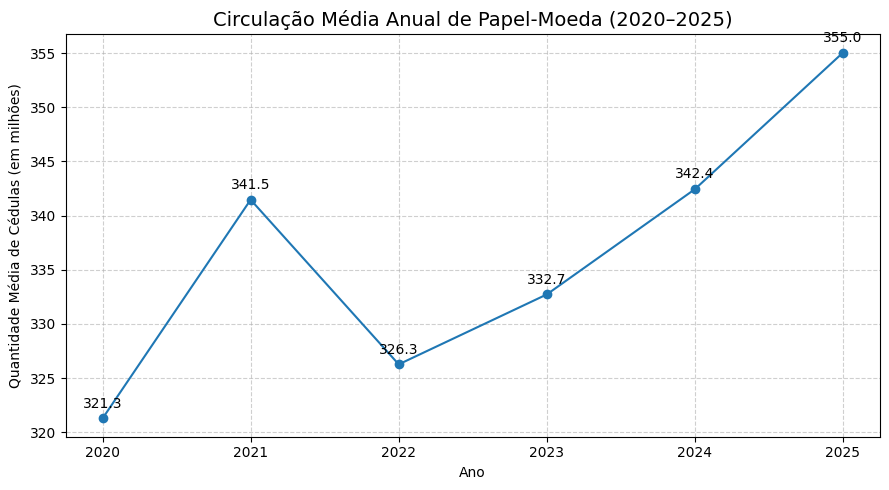

In [16]:
import matplotlib.pyplot as plt

# Converter para milhões
media_anual['valor_milhoes'] = media_anual['valor'] / 1_000_000

plt.figure(figsize=(9,5))

plt.plot(
    media_anual['ano'],
    media_anual['valor_milhoes'],
    marker='o'
)

plt.title("Circulação Média Anual de Papel-Moeda (2020–2025)", fontsize=14)
plt.xlabel("Ano")
plt.ylabel("Quantidade Média de Cédulas (em milhões)")

plt.xticks(media_anual['ano'])
plt.grid(True, linestyle='--', alpha=0.6)

# 🔥 Adicionar valor em cada ponto
for i in range(len(media_anual)):
    plt.text(
        media_anual['ano'][i],
        media_anual['valor_milhoes'][i] + 1,
        f"{media_anual['valor_milhoes'][i]:.1f}",
        ha='center'
    )

plt.tight_layout()
plt.show()
